<a href="https://colab.research.google.com/github/williamjsmith15/Conversions/blob/master/NNinPythonWorkshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print('Hello World')

Hello World


This is a text cell :)

In [4]:
!wget https://www.dropbox.com/s/qbt6rcwglok3xpw/chest_xrays.zip

--2022-12-05 13:32:33--  https://www.dropbox.com/s/qbt6rcwglok3xpw/chest_xrays.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/qbt6rcwglok3xpw/chest_xrays.zip [following]
--2022-12-05 13:32:33--  https://www.dropbox.com/s/raw/qbt6rcwglok3xpw/chest_xrays.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucec953ea48d52421351e30161db.dl.dropboxusercontent.com/cd/0/inline/ByArtqQZ8-7Y9qqCySgaTQ6M62ychoMGu4noewRpsyKFpaPAGhg-vSFQYiuQ11tnO3duagIuTK4LPnJgI-rXGDZPRahjr13Zogd5HI7S2srTIhLkMZXHXh6wRqKzN5GMDFHxKNaoNZlUDCDtUVZCEt8GVnLomTEkkwpu_Z1rkRAhKQ/file# [following]
--2022-12-05 13:32:34--  https://ucec953ea48d52421351e30161db.dl.dropboxusercontent.com/cd/0/inline/ByArtqQZ8-7Y9qqCySgaTQ6M62ychoMGu4noewRpsyKFpaPAGhg-vSFQYiuQ11tnO3dua

In [5]:
!unzip chest_xrays.zip

Archive:  chest_xrays.zip
   creating: chest_xrays/
   creating: chest_xrays/effusion/
  inflating: chest_xrays/effusion/e132.png  
  inflating: chest_xrays/effusion/e126.png  
  inflating: chest_xrays/effusion/e318.png  
  inflating: chest_xrays/effusion/e330.png  
  inflating: chest_xrays/effusion/e324.png  
  inflating: chest_xrays/effusion/e287.png  
  inflating: chest_xrays/effusion/e293.png  
  inflating: chest_xrays/effusion/e278.png  
  inflating: chest_xrays/effusion/e244.png  
  inflating: chest_xrays/effusion/e250.png  
  inflating: chest_xrays/effusion/e21.png  
  inflating: chest_xrays/effusion/e35.png  
  inflating: chest_xrays/effusion/e34.png  
  inflating: chest_xrays/effusion/e20.png  
  inflating: chest_xrays/effusion/e251.png  
  inflating: chest_xrays/effusion/e245.png  
  inflating: chest_xrays/effusion/e279.png  
  inflating: chest_xrays/effusion/e292.png  
  inflating: chest_xrays/effusion/e286.png  
  inflating: chest_xrays/effusion/e325.png  
  inflating: ches

Now we've imported the data, create list of filepaths that are eiher paths of normal / effusion x-rays to access later

In [6]:
# The glob module finds all the pathnames matching a specified pattern
from glob import glob
import os

# If your dataset is compressed, unzip with:
# !unzip chest_xrays.zip

# Define folders containing images
data_path = os.path.join("chest_xrays")
effusion_path = os.path.join(data_path, "effusion", "*.png")
normal_path = os.path.join(data_path, "normal", "*.png")

# Create list of files
effusion_list = glob(effusion_path)
normal_list = glob(normal_path)

print('Number of cases with pleural effusion: ', len(effusion_list)) 
print('Number of normal cases: ', len(normal_list))

Number of cases with pleural effusion:  350
Number of normal cases:  350


# Visualising the X-rays

In the previous section, we set up a dataset comprising 700 chest X-rays. Half of the X-rays are labelled “normal” and half are labelled as “pleural effusion”. Let’s take a look at some of the images. - OpenCV is a computer vision library for this kinda thing

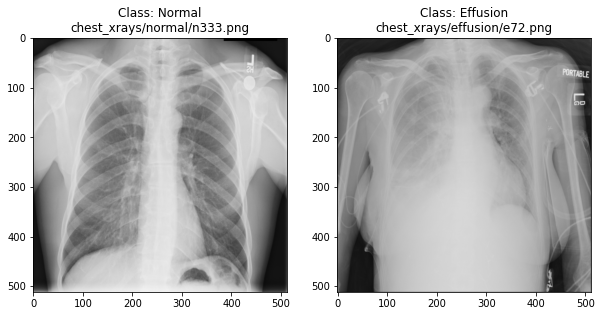

In [7]:
# cv2 is openCV, a popular computer vision library
import cv2
from matplotlib import pyplot as plt 
import random

def plot_example(example, label, loc):
    image = cv2.imread(example)
    im = ax[loc].imshow(image)
    title = f"Class: {label}\n{example}"
    ax[loc].set_title(title)

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 10)

# Plot a "normal" record
plot_example(random.choice(normal_list), "Normal", 0)

# Plot a record labelled with effusion
plot_example(random.choice(effusion_list), "Effusion", 1)

# First Classification

Here we randomly classify the dataset as effusion or normal

Effusion or not?


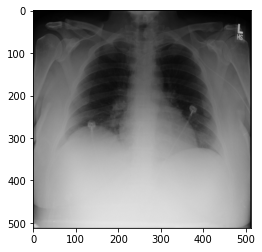

In [8]:
print("Effusion or not?")

# flip a coin
coin_flip = random.choice(["Effusion", "Normal"])
if coin_flip == "Normal":
    fn = random.choice(normal_list)
else:
    fn = random.choice(effusion_list)

# plot the image
image = cv2.imread(fn)
plt.imshow(image)

In [9]:
# Jupyter doesn't allow us to print the image until the cell has run,
# so we'll print in a new cell.
print(f"The answer is: {coin_flip}!")

The answer is: Normal!


# Computer Visualisation of Images

In [14]:
import numpy as np 

file_idx = 55
example = normal_list[file_idx]
image = cv2.imread(example)

print(image.shape)

(512, 512, 3)


see that there is 3D to image array - RGB

In [15]:
image = cv2.imread(example, cv2.IMREAD_GRAYSCALE)
print(image.shape)

(512, 512)


make it 1D by greyscale and then print out a bit of it

[[23 22 22 21 21 21 21 20 19 19]
 [22 21 20 20 20 19 20 20 19 18]
 [20 20 20 19 19 19 18 18 17 17]
 [20 19 19 18 18 18 17 18 16 17]
 [18 18 18 17 17 16 17 16 17 22]
 [17 17 17 16 16 16 20 30 47 63]
 [17 16 16 19 27 41 56 68 76 83]
 [19 26 38 51 62 72 79 85 90 95]
 [47 57 65 73 79 84 91 93 96 96]
 [69 74 80 85 89 92 94 93 93 93]]


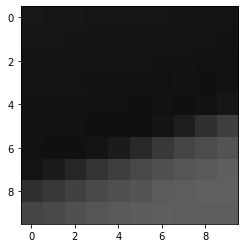

In [20]:
# Print a 10 by 10 chunk of the matrix
print(image[35:45, 40:50])
# Plot the same chunk as an image
plt.imshow(image[35:45, 40:50], cmap='gray', vmin=0, vmax=255)

# Image Pre-Processing

loading all of the images and corresponding labels and assigning them to a list

In [21]:
# create a list of effusion images and labels
dataset_effusion = [cv2.imread(fn, cv2.IMREAD_GRAYSCALE) for fn in effusion_list]
label_effusion = np.ones(len(dataset_effusion))

# create a list of normal images and labels
dataset_normal = [cv2.imread(fn, cv2.IMREAD_GRAYSCALE) for fn in normal_list]
label_normal = np.zeros(len(dataset_normal))

# Combine the lists
dataset = dataset_effusion + dataset_normal
labels = np.concatenate([label_effusion, label_normal])

And downsample & normalise data

In [22]:
# Downsample the images from (512,512) to (256,256)
dataset = [cv2.resize(img, (256,256)) for img in dataset]

# Check the size of the reshaped images
print(dataset[0].shape)

# Normalize the data
# Subtract the mean, divide by the standard deviation.
for i in range(len(dataset)):
  dataset[i] = (dataset[i] - np.average(dataset[i], axis= (0, 1))) / np.std(dataset[i], axis= (0, 1)) 

(256, 256)


In [23]:
dataset = np.asarray(dataset, dtype=np.float32) #List to array
print(f"Matrix Dimensions: {dataset.shape}")

Matrix Dimensions: (700, 256, 256)


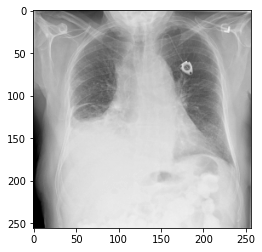

In [26]:
idx = 5
vals = dataset[idx].flatten()
plt.imshow(dataset[idx], cmap='gray', vmin=min(vals), vmax=max(vals))

# Data Preparation Section

# Partition into a Training and Testing Set

Here we've taken a random set but specified the random state of python (so that we can reproduce the same split to help for repeatability of results in the future)

In [27]:
from sklearn.model_selection import train_test_split

# Our Tensorflow model requires the input to be:
# [batch, height, width, n_channels]
# So we need to add a dimension to the dataset and labels.
# 
# Ellipsis (...) is shorthand for selecting with ":" across dimensions. 
# np.newaxis expands the selection by one dimension.
dataset = dataset[..., np.newaxis]
labels = labels[..., np.newaxis]

# Create training and test sets
dataset_train, dataset_test, labels_train, labels_test = train_test_split(dataset, labels, test_size=0.15, random_state=42)

# Create a validation set
dataset_train, dataset_val, labels_train, labels_val = train_test_split(dataset_train, labels_train, test_size=0.15, random_state=42)

print("No. images, x_dim, y_dim, colors) (No. labels, 1)\n")
print(f"Train: {dataset_train.shape}, {labels_train.shape}")
print(f"Validation: {dataset_val.shape}, {labels_val.shape}")
print(f"Test: {dataset_test.shape}, {labels_test.shape}")

No. images, x_dim, y_dim, colors) (No. labels, 1)

Train: (505, 256, 256, 1), (505, 1)
Validation: (90, 256, 256, 1), (90, 1)
Test: (105, 256, 256, 1), (105, 1)


# Data augmentation
Basically don't want to overfit model => artificially increase the size of the data set with this - basically apply random transformations to have more images

In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define what kind of transformations we would like to apply
# such as rotation, crop, zoom, position shift, etc
datagen = ImageDataGenerator(
    rotation_range=2,
    width_shift_range=0.01,
    height_shift_range=0.01,
    zoom_range=0.01,
    horizontal_flip=False)

Look at some of the augmented images

Found 700 images belonging to 2 classes.


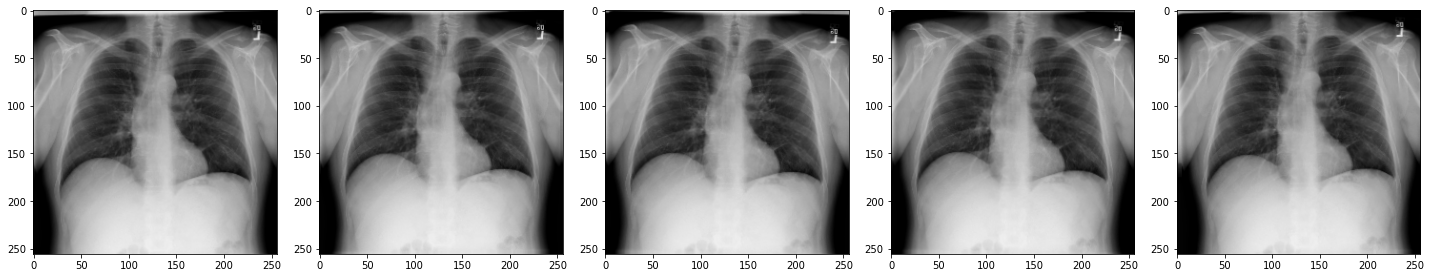

In [66]:
# specify path to source data
path = os.path.join("chest_xrays")
batch_size=5

val_generator = datagen.flow_from_directory(
        path, color_mode="rgb",
        target_size=(256, 256),
        batch_size=batch_size)

def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img.astype('uint8'))
    plt.tight_layout()
    plt.show()

augmented_images = [val_generator[0][0][0] for i in range(batch_size)]
plot_images(augmented_images)

# Neural Network Time!
See - https://carpentries-incubator.github.io/machine-learning-neural-python/04-create_net/index.html

Convolutional NN

In [67]:
# Create the architecture of our convolutional neural network, using
# the tensorflow library
from tensorflow.random import set_seed
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# set random seed for reproducibility
set_seed(42)
 
# Our input layer should match the input shape of our images.
# A CNN takes tensors of shape (image_height, image_width, color_channels)
# We ignore the batch size when describing the input layer
# Our input images are 256 by 256, plus a single colour channel.
inputs = Input(shape=(256, 256, 1))

# Let's add the first convolutional layer
x = Conv2D(filters=8, kernel_size=3, padding='same', activation='relu')(inputs)

# MaxPool layers are similar to convolution layers. 
# The pooling operation involves sliding a two-dimensional filter over each channel of feature map and selecting the max values.
# We do this to reduce the dimensions of the feature maps, helping to limit the amount of computation done by the network.
x = MaxPool2D()(x)

# We will add more convolutional layers, followed by MaxPool
x = Conv2D(filters=8, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(filters=12, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(filters=12, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(filters=20, kernel_size=5, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(filters=20, kernel_size=5, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(filters=50, kernel_size=5, padding='same', activation='relu')(x)

# Global max pooling reduces dimensions back to the input size
x = GlobalAveragePooling2D()(x)

# Finally we will add two "dense" or "fully connected layers".
# Dense layers help with the classification task, after features are extracted.
x = Dense(128, activation='relu')(x)

# Dropout is a technique to help prevent overfitting that involves deleting neurons.
x = Dropout(0.6)(x)

x = Dense(32, activation='relu')(x)

# Our final dense layer has a single output to match the output classes.
# If we had multi-classes we would match this number to the number of classes.
outputs = Dense(1, activation='sigmoid')(x)

# Finally, we will define our network with the input and output of the network
model = Model(inputs=inputs, outputs=outputs)

In [68]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_14 (Conv2D)          (None, 256, 256, 8)       80        
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 128, 128, 8)       584       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 12)        876 

Complie and Train Model

In [73]:
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the network optimization method. 
# Adam is a popular gradient descent algorithm
# with adaptive, per-parameter learning rates.
custom_adam = optimizers.Adam()

# Compile the model defining the 'loss' function type, optimization and the metric.
model.compile(loss='binary_crossentropy', optimizer=custom_adam, metrics=['acc'])

# Save the best model found during training
checkpointer = ModelCheckpoint(filepath='best_model.hdf5', monitor='val_loss',
                               verbose=1, save_best_only=True)

# Now train our network!
# steps_per_epoch = len(dataset_train)//batch_size
hist = model.fit(datagen.flow(dataset_train, labels_train, batch_size=32), 
                 steps_per_epoch=15, 
                 epochs=20, 
                 validation_data=(dataset_val, labels_val), 
                 callbacks=[checkpointer])

Epoch 1/20
15/15 [==============================] - ETA: 0s - loss: 0.4509 - acc: 0.8140
Epoch 1: val_loss improved from inf to 0.45116, saving model to best_model.hdf5
15/15 [==============================] - 19s 1s/step - loss: 0.4509 - acc: 0.8140 - val_loss: 0.4512 - val_acc: 0.7889
Epoch 2/20
15/15 [==============================] - ETA: 0s - loss: 0.4457 - acc: 0.8288
Epoch 2: val_loss did not improve from 0.45116
15/15 [==============================] - 16s 1s/step - loss: 0.4457 - acc: 0.8288 - val_loss: 0.4871 - val_acc: 0.7778
Epoch 3/20
15/15 [==============================] - ETA: 0s - loss: 0.4282 - acc: 0.8354
Epoch 3: val_loss did not improve from 0.45116
15/15 [==============================] - 16s 1s/step - loss: 0.4282 - acc: 0.8354 - val_loss: 0.4521 - val_acc: 0.7889
Epoch 4/20
15/15 [==============================] - ETA: 0s - loss: 0.3744 - acc: 0.8562
Epoch 4: val_loss did not improve from 0.45116
15/15 [==============================] - 16s 1s/step - loss: 0.374

plot results of training

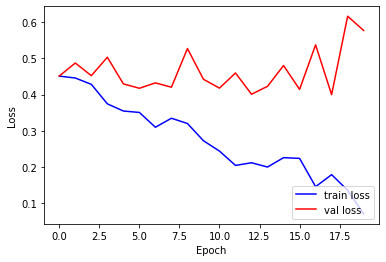

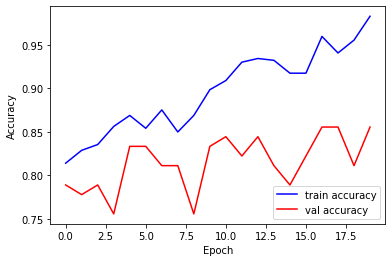

In [74]:
plt.plot(hist.history['loss'], 'b-', label='train loss')
plt.plot(hist.history['val_loss'], 'r-', label='val loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

plt.plot(hist.history['acc'], 'b-', label='train accuracy')
plt.plot(hist.history['val_acc'], 'r-', label='val accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

Evaluate model based on held back test dataset

In [75]:
from tensorflow.keras.models import load_model 

# Open the best model saved during training
best_model = load_model('best_model.hdf5')
print('\nNeural network weights updated to the best epoch.')


Neural network weights updated to the best epoch.


In [76]:
# We use the evaluate function to evaluate the accuracy of our model in the test group
print(f"Accuracy in test group: {best_model.evaluate(dataset_test, labels_test, verbose=0)[1]}")

Accuracy in test group: 0.8666666746139526


# Explainability
Basically how you can say why the NN has given the result that it has

In [78]:
!pip install tf_keras_vis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 949 kB/s 


This is a salency map but basically gives the importance of each image to the result of the NN

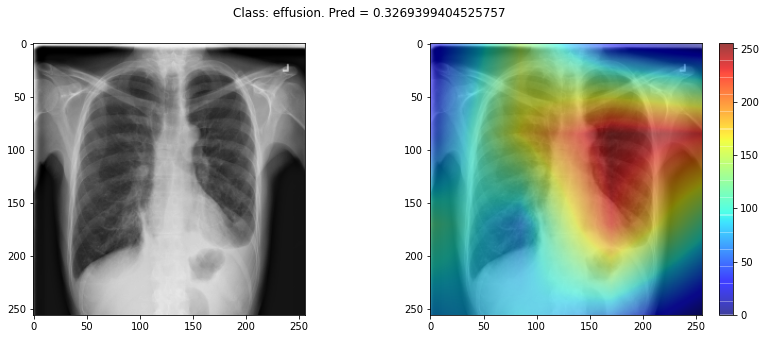

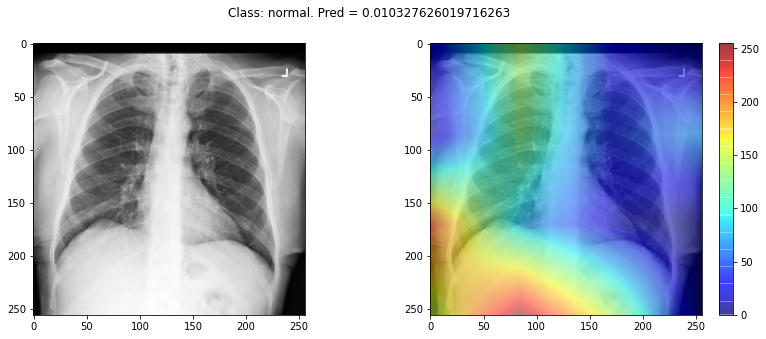

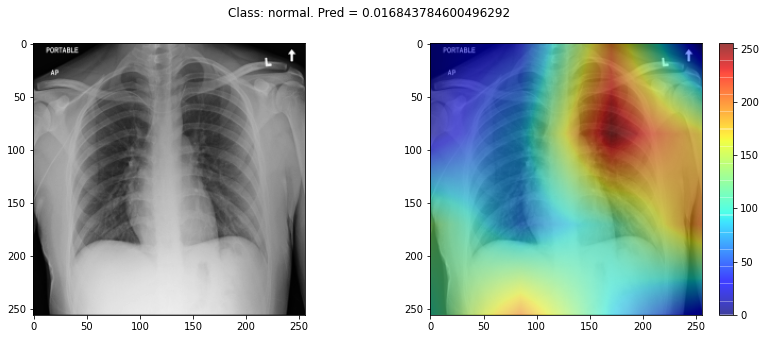

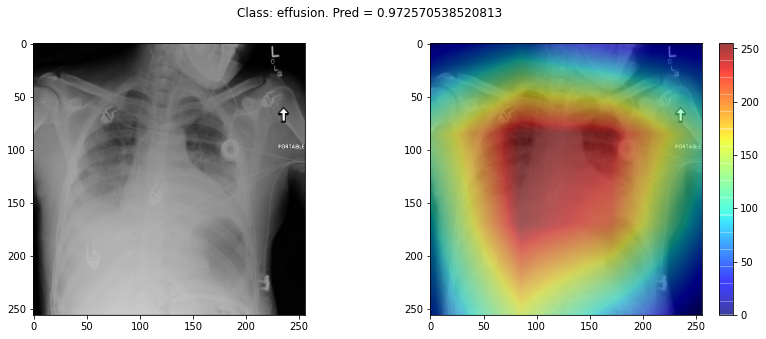

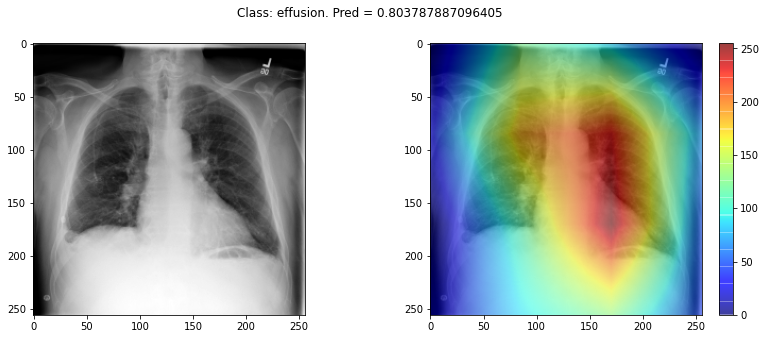

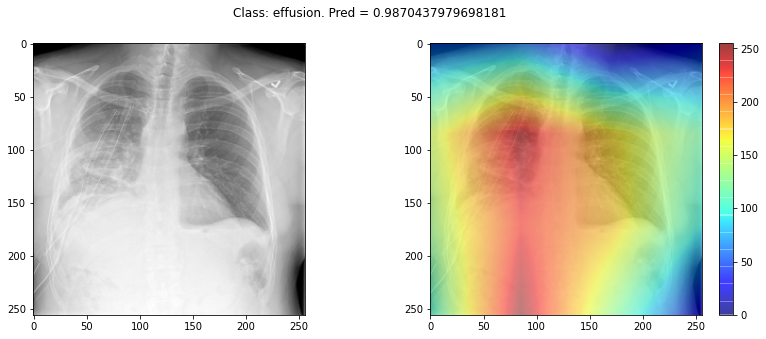

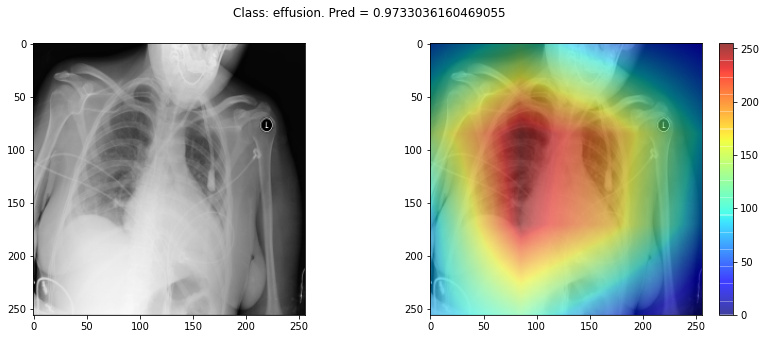

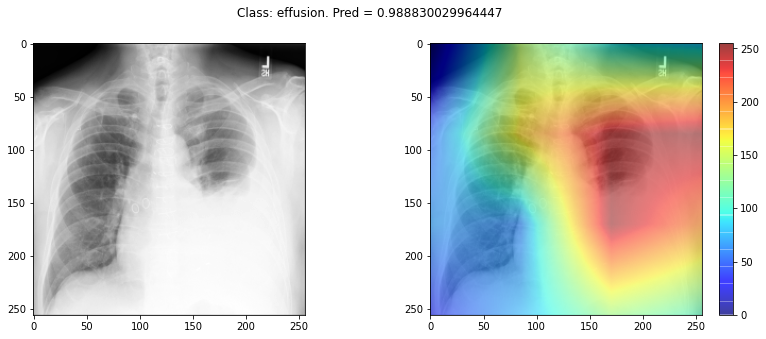

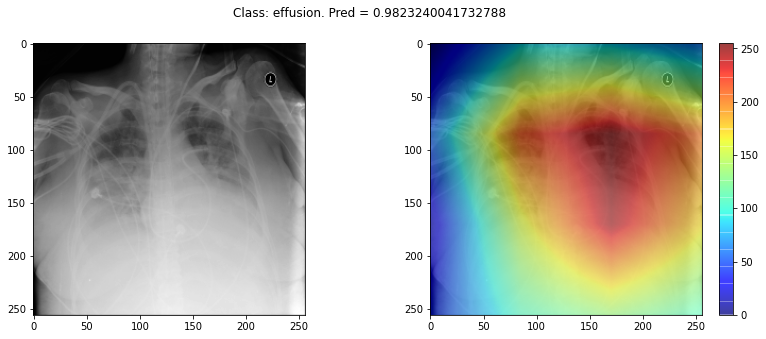

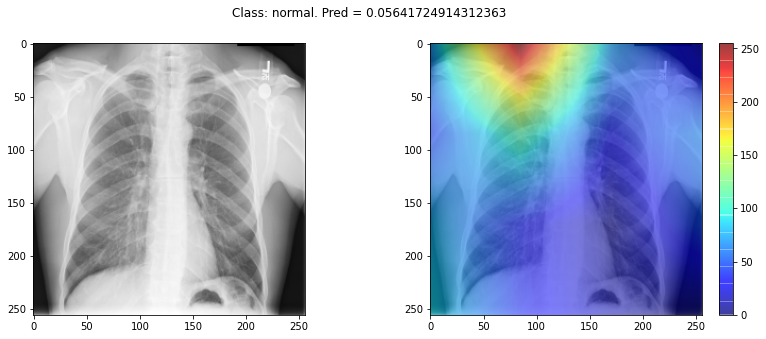

In [79]:
# !pip install tf_keras_vis
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

import numpy as np
from matplotlib import pyplot as plt
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.scorecam import Scorecam
from tf_keras_vis.utils.scores import CategoricalScore

# Select two differing explainability algorithms
gradcam = GradcamPlusPlus(best_model, clone=True)
scorecam = Scorecam(best_model, clone=True)


def plot_map(cam, classe, prediction, img):
    """
    Plot the image.
    """
    fig, axes = plt.subplots(1,2, figsize=(14, 5))
    axes[0].imshow(np.squeeze(img), cmap='gray')
    axes[1].imshow(np.squeeze(img), cmap='gray')
    heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)
    i = axes[1].imshow(heatmap, cmap="jet", alpha=0.5)
    fig.colorbar(i)
    plt.suptitle("Class: {}. Pred = {}".format(classe, prediction))

# Plot each image with accompanying saliency map
for image_id in range(10):
    SEED_INPUT = dataset_test[image_id]
    CATEGORICAL_INDEX = [0]

    layer_idx = 18
    penultimate_layer_idx = 13
    class_idx  = 0

    cat_score = labels_test[image_id]
    cat_score = CategoricalScore(CATEGORICAL_INDEX)
    cam = gradcam(cat_score, SEED_INPUT, 
                  penultimate_layer = penultimate_layer_idx,
                  normalize_cam=True)
    
    # Display the class
    _class = 'normal' if labels_test[image_id] == 0 else 'effusion'
    _prediction = best_model.predict(dataset_test[image_id][np.newaxis, :, ...], verbose=0)
    
    plot_map(cam, _class, _prediction[0][0], SEED_INPUT)

Sanity checks for saliency maps - basically to see if different techniques agree or disagree with each other

2/2 [==============================] - 0s 184ms/step


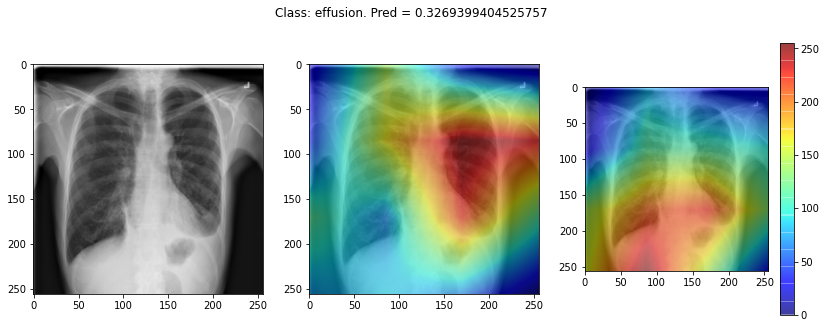

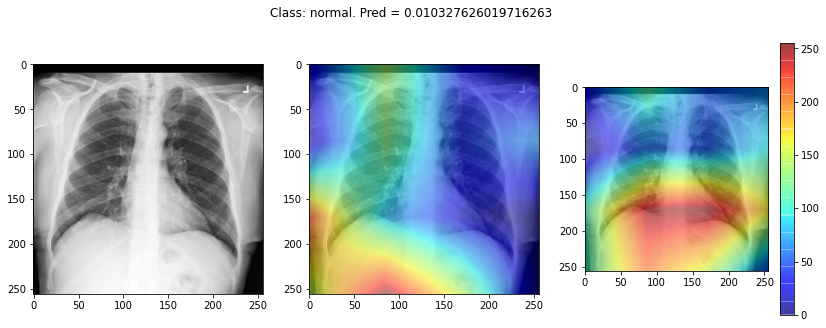

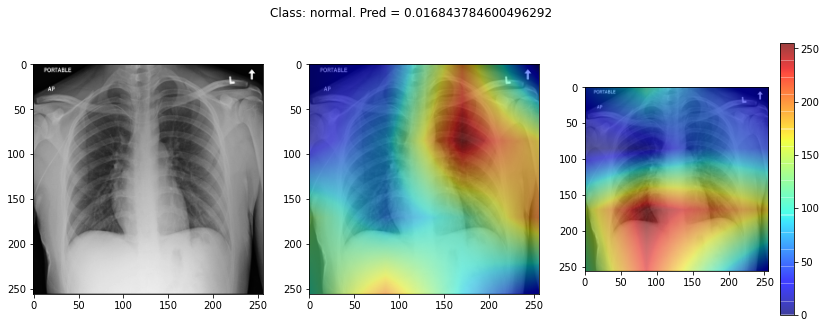

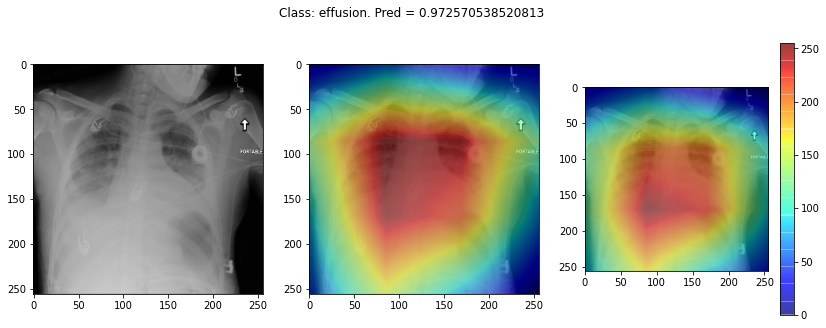

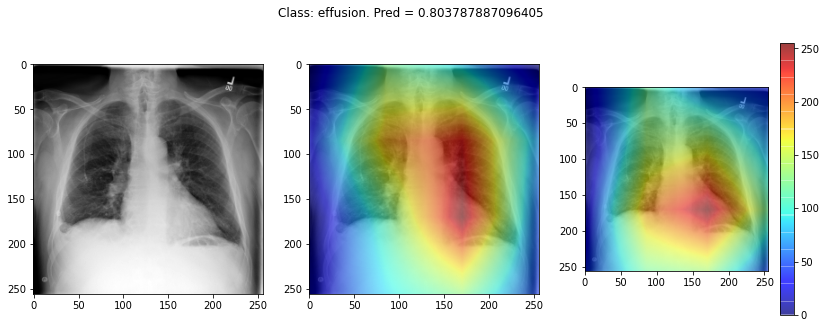

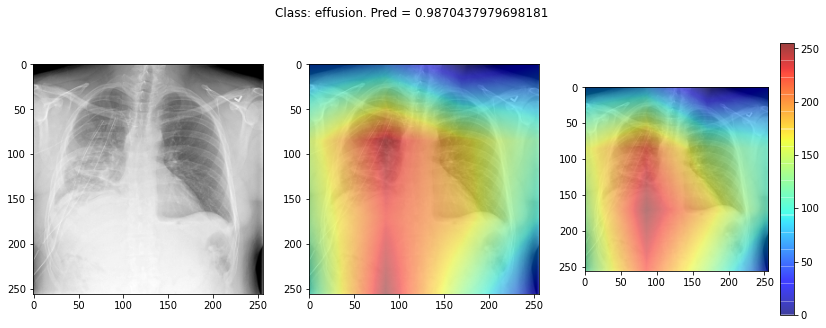

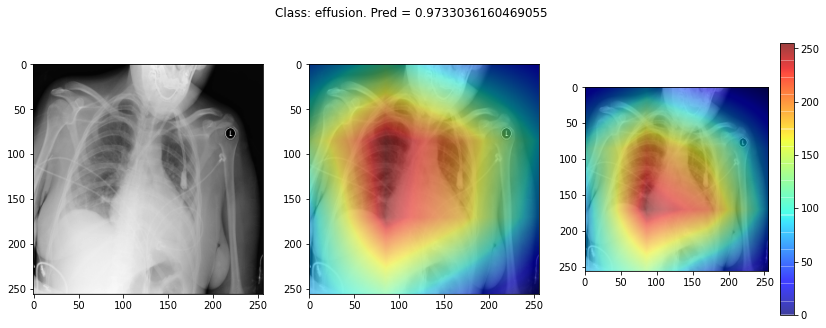

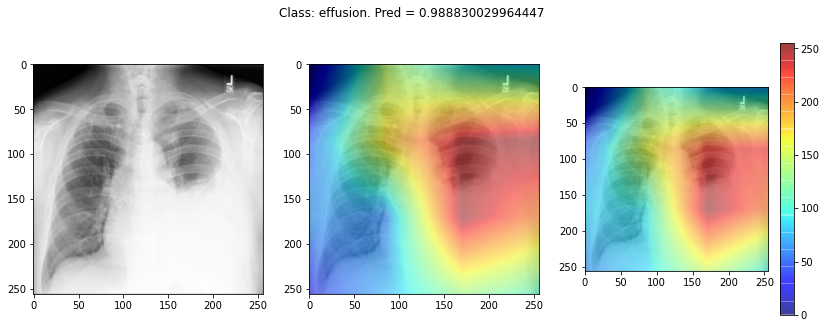

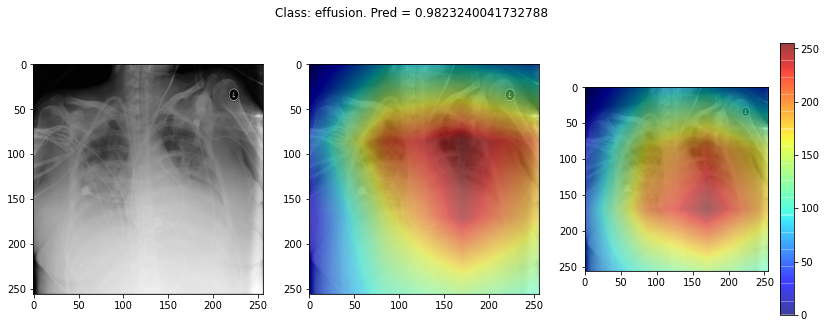

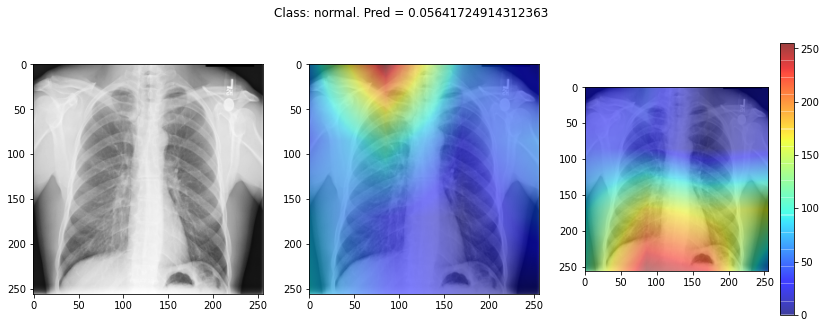

In [80]:
def plot_map2(cam1, cam2, classe, prediction, img):
    """
    Plot the image.
    """
    fig, axes = plt.subplots(1, 3, figsize=(14, 5))
    axes[0].imshow(np.squeeze(img), cmap='gray')
    axes[1].imshow(np.squeeze(img), cmap='gray')
    axes[2].imshow(np.squeeze(img), cmap='gray')
    heatmap1 = np.uint8(cm.jet(cam1[0])[..., :3] * 255)
    heatmap2 = np.uint8(cm.jet(cam2[0])[..., :3] * 255)
    i = axes[1].imshow(heatmap1, cmap="jet", alpha=0.5)
    j = axes[2].imshow(heatmap2, cmap="jet", alpha=0.5)
    fig.colorbar(i)
    plt.suptitle("Class: {}. Pred = {}".format(classe, prediction))

# Plot each image with accompanying saliency map
for image_id in range(10):
    SEED_INPUT = dataset_test[image_id]
    CATEGORICAL_INDEX = [0]

    layer_idx = 18
    penultimate_layer_idx = 13
    class_idx  = 0

    cat_score = labels_test[image_id]
    cat_score = CategoricalScore(CATEGORICAL_INDEX)
    cam = gradcam(cat_score, SEED_INPUT, 
                  penultimate_layer = penultimate_layer_idx,
                  normalize_cam=True)
    cam2 = scorecam(cat_score, SEED_INPUT, 
                  penultimate_layer = penultimate_layer_idx,
                  normalize_cam=True
                  )
    
    # Display the class
    _class = 'normal' if labels_test[image_id] == 0 else 'effusion'
    _prediction = best_model.predict(dataset_test[image_id][np.newaxis, : ,...], verbose=0)
    
    plot_map2(cam, cam2, _class, _prediction[0][0], SEED_INPUT)